In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [62]:
df=pd.read_csv('train_XnW6LSF.csv')
df1=pd.read_csv('test_FewQE9B.csv')

In [63]:
print(df.shape,df1.shape)

(8523, 12) (5681, 11)


In [64]:
df['source']='Train'
df1['source']='Test'

In [65]:
newdf=pd.concat([df,df1])

In [66]:
newdf.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train


In [67]:
newdf.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [68]:
#Impute Item weight
newdf[newdf.Item_Weight.isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,Train
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,Train
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,Train
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,Test
5656,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,Test
5661,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,Test
5665,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,Test


In [69]:
newdf[newdf.Item_Identifier=='FDN31']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
1610,FDN31,11.5,Low Fat,0.073029,Fruits and Vegetables,187.953,OUT045,2002,NaN,Tier 2,Supermarket Type1,2656.542,Train
1866,FDN31,11.5,Low Fat,0.072995,Fruits and Vegetables,189.253,OUT049,1999,Medium,Tier 1,Supermarket Type1,1328.271,Train
2494,FDN31,11.5,Low Fat,0.072821,Fruits and Vegetables,191.253,OUT013,1987,High,Tier 3,Supermarket Type1,3036.048,Train
3741,FDN31,11.5,Low Fat,0.072882,Fruits and Vegetables,191.353,OUT046,1997,Small,Tier 1,Supermarket Type1,2277.036,Train
340,FDN31,11.5,Low Fat,0.073178,Fruits and Vegetables,189.153,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
1113,FDN31,11.5,low fat,0.073294,Fruits and Vegetables,191.053,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test
2093,FDN31,11.5,Low Fat,0.072868,Fruits and Vegetables,191.653,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN,Test
5490,FDN31,11.5,Low Fat,0.121989,Fruits and Vegetables,191.453,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,Test
5669,FDN31,NaN,Low Fat,0.072529,Fruits and Vegetables,188.053,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,Test


In [70]:
pt1=pd.pivot_table(data=newdf,index='Item_Identifier',values='Item_Weight',aggfunc=np.max)
newdf1=newdf.merge(pt1, on='Item_Identifier',how='inner')
newdf1.drop('Item_Weight_x',axis=1,inplace=True)
newdf1.rename(columns={'Item_Weight_y':'Item_Weight'},inplace=True)

In [71]:
newdf1.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Weight                     0
dtype: int64

In [72]:
newdf1.Outlet_Size.fillna('unknown',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


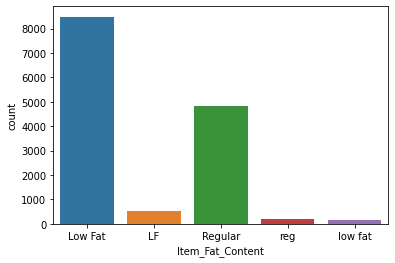

In [73]:
import seaborn as sns
sns.countplot(newdf1.Item_Fat_Content)

In [74]:
newdf1['Item_Fat_Content']=newdf1['Item_Fat_Content'].map({'Low Fat':'Low Fat','LF':'Low Fat','low fat':'Low Fat','reg':'Regular','Regular':'Regular'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


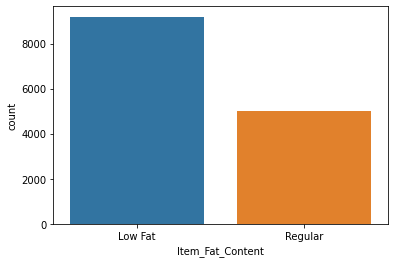

In [75]:
sns.countplot(newdf1.Item_Fat_Content)

In [76]:
newdf1['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [82]:
newdf1['Item_Visibility']=newdf1.Item_Visibility.replace(0.0,newdf1.Item_Visibility.mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

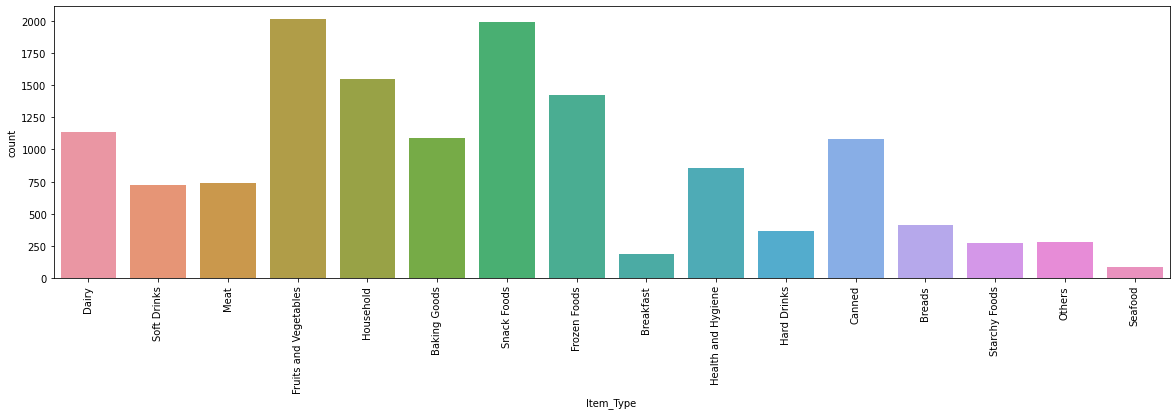

In [88]:
plt.figure(figsize=(20,5))
sns.countplot(newdf1['Item_Type'])
plt.xticks(rotation=90)

In [92]:

newdf1.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

<Figure size 1440x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


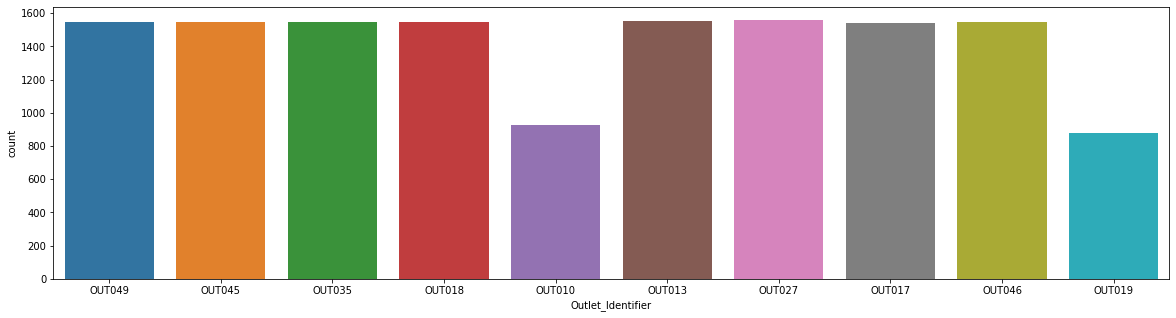

In [93]:
plt.figure(figsize=(20,5))
sns.countplot(newdf1.Outlet_Identifier)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


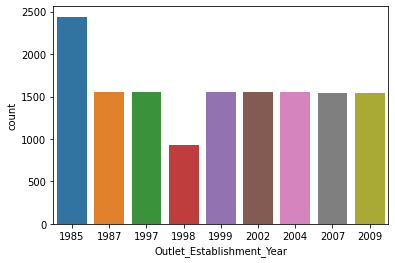

In [95]:
sns.countplot(newdf1.Outlet_Establishment_Year)

In [97]:
newdf1['age']=2013-newdf1['Outlet_Establishment_Year']
newdf1.drop('Outlet_Establishment_Year',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


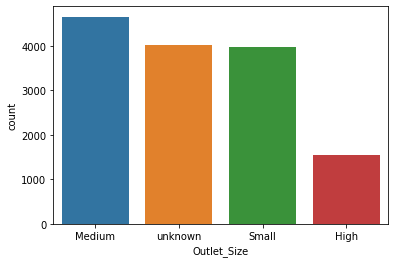

In [98]:
sns.countplot(newdf1.Outlet_Size)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


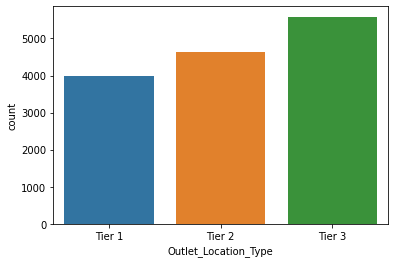

In [99]:
sns.countplot(newdf1.Outlet_Location_Type)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


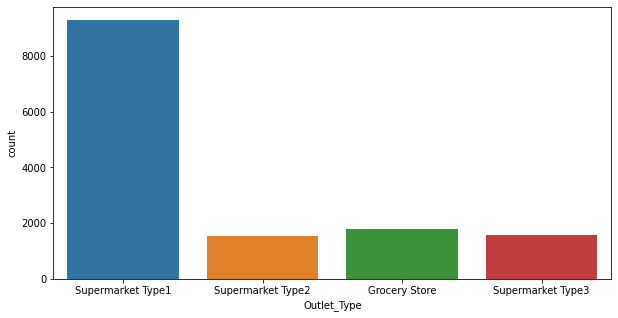

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(newdf1.Outlet_Type)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


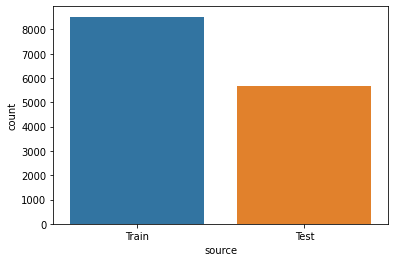

In [102]:
cat_data=[]

In [103]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       14204 non-null  object 
 1   Item_Fat_Content      14204 non-null  object 
 2   Item_Visibility       14204 non-null  float64
 3   Item_Type             14204 non-null  object 
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Identifier     14204 non-null  object 
 6   Outlet_Size           14204 non-null  object 
 7   Outlet_Location_Type  14204 non-null  object 
 8   Outlet_Type           14204 non-null  object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  source                14204 non-null  object 
 11  Item_Weight           14204 non-null  float64
 12  age                   14204 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 2.0+ MB


In [105]:
newdf1['item_idfy']=newdf1.Item_Identifier.apply(lambda x: x[0:2])
newdf1.drop('Item_Identifier',axis=1,inplace=True)
newdf1.item_idfy=newdf1.item_idfy.map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})


In [106]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
catcol=['item_idfy','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in catcol:
  newdf1[i]=lb.fit_transform(newdf1[i])

In [107]:
newdf1.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Weight,age,item_idfy
0,0,0.016047,4,249.8092,9,1,0,1,3735.1380,Train,9.3,14,1
1,0,0.016055,4,250.2092,7,3,1,1,5976.2208,Train,9.3,11,1
2,0,0.016019,4,248.5092,6,2,1,1,6474.2392,Train,9.3,9,1
3,0,0.016088,4,249.6092,3,1,2,2,5976.2208,Train,9.3,4,1
4,0,0.026818,4,248.9092,0,3,2,0,498.0184,Train,9.3,15,1


In [108]:
data_test=newdf1[newdf1.source=='Test']
data_train=newdf1[newdf1.source=='Train']

In [111]:
data_test.drop('Item_Outlet_Sales',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [113]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 8 to 14203
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Fat_Content      5681 non-null   int64  
 1   Item_Visibility       5681 non-null   float64
 2   Item_Type             5681 non-null   int64  
 3   Item_MRP              5681 non-null   float64
 4   Outlet_Identifier     5681 non-null   int64  
 5   Outlet_Size           5681 non-null   int64  
 6   Outlet_Location_Type  5681 non-null   int64  
 7   Outlet_Type           5681 non-null   int64  
 8   source                5681 non-null   object 
 9   Item_Weight           5681 non-null   float64
 10  age                   5681 non-null   int64  
 11  item_idfy             5681 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 577.0+ KB


In [114]:
data_test.drop('source',axis=1,inplace=True)
data_train.drop('source',axis=1,inplace=True)        

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [115]:
X=data_train.drop('Item_Outlet_Sales',axis=1)
y=data_train['Item_Outlet_Sales']

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [121]:
from keras.models import Sequential
from keras.layers import Dense,InputLayer



In [123]:
Input_neurons=X_train.shape[1]
hidden1=10
hidden2=5
output=1

In [144]:
model=Sequential()
model.add(InputLayer(input_shape=(Input_neurons,)))
model.add(Dense(hidden1,activation='relu'))
model.add(Dense(hidden1,activation='relu'))
model.add(Dense(hidden1,activation='relu'))
model.add(Dense(hidden2,activation='relu'))
model.add(Dense(output,activation='linear'))

In [145]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [150]:

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [151]:
hist=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
214/214 [==============================] - 1s 3ms/step - loss: 7308897.5000 - mean_squared_error: 7308897.5000 - val_loss: 5106431.5000 - val_mean_squared_error: 5106431.5000
Epoch 2/50
214/214 [==============================] - 1s 3ms/step - loss: 2565768.0000 - mean_squared_error: 2565768.0000 - val_loss: 1911402.2500 - val_mean_squared_error: 1911402.2500
Epoch 3/50
214/214 [==============================] - 1s 3ms/step - loss: 1996474.1250 - mean_squared_error: 1996474.1250 - val_loss: 1896414.8750 - val_mean_squared_error: 1896414.8750
Epoch 4/50
214/214 [==============================] - 1s 3ms/step - loss: 1978574.2500 - mean_squared_error: 1978574.2500 - val_loss: 1878404.6250 - val_mean_squared_error: 1878404.6250
Epoch 5/50
214/214 [==============================] - 1s 3ms/step - loss: 1953873.2500 - mean_squared_error: 1953873.2500 - val_loss: 1855362.5000 - val_mean_squared_error: 1855362.5000
Epoch 6/50
214/214 [==============================] - 1s 3ms/step - lo

In [152]:
predictions=model.predict(X_test)

In [153]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(predictions,y_test)))

1079.4809739917648


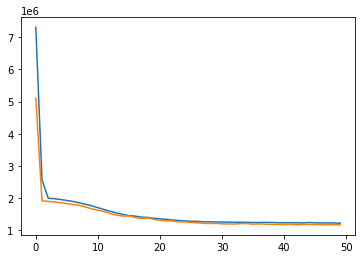

In [154]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])

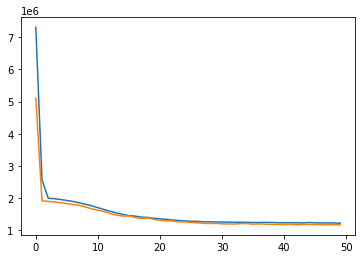

In [155]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [156]:
predic=model.predict(data_test)

In [157]:
output_df=pd.DataFrame(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
output_df['Item_Identifier']=df1['Item_Identifier']
output_df['Outlet_Identifier']=df1['Outlet_Identifier']
output_df['Item_Outlet_Sales']=predic

In [159]:
output_df.to_csv('output.csv')